<a href="https://colab.research.google.com/github/Sreenathkk00/Machine-Learning-Projects/blob/main/Hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Classification**

---



## **Objective**

* This project aims to construct a machine learning model capable of accurately classifying handwritten digits.
* The model will be trained on a dataset of labeled images containing handwritten digits (0-9).
* The trained model will then be able to predict the digit represented by a new, unseen handwritten image.

## **Data Source**

### Dataset Information
- **Source:** YBI Foundation's GitHub repository
- **Content:** Images of handwritten digits (0-9) with corresponding labels
- **Purpose:** Suitable for training machine learning models for digit classification

### Accessing the Data
- **Download Link:** [YBI Foundation's GitHub repository](https://github.com/ybibus/handwritten-digit-classification)

### Data Format
- **Structure:** Organized into folders by digit class (0-9)
- **Images:** Grayscale format, consistent size

### Utilization
- **Model Training:** Suitable for training models such as CNNs or SVMs
- **Application:** Trained models can predict digits from new handwritten images

### Benefits
1. **Data Quality:** High-quality images with clear, consistent labeling
2. **Data Size:** Sufficiently large for robust model training
3. **Open Access:** Freely available for download and use by researchers and enthusiasts

## **Import Library**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [102]:
from sklearn.datasets import load_digits
df = load_digits()



## **Describe Data**

In [103]:
print(df.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## **Data Visualization**

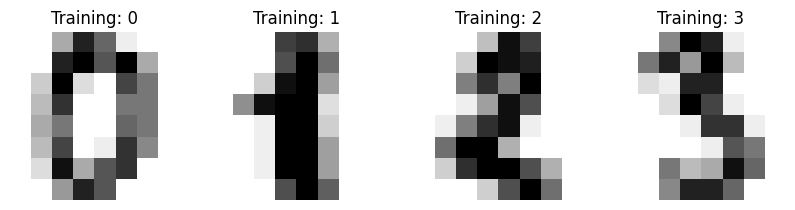

In [73]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## **Data Procecessing**

In [74]:
df.images.shape

(1797, 8, 8)

In [75]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [76]:
df.images[0].shape


(8, 8)

In [77]:
len(df.images)

1797

In [78]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [79]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

In [ ]:
data.shape

## **Scaling Image Data**

In [82]:
data.min()

0.0

In [83]:
data.max()

16.0

In [84]:
data = data/16

In [85]:
data.min()

0.0

In [86]:
data.max()

1.0

In [87]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [90]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier()

In [93]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred = rf.predict(x_test)
y_pred

array([2, 5, 6, 2, 6, 1, 7, 2, 3, 3, 1, 8, 5, 8, 0, 5, 9, 4, 0, 3, 8, 0,
       7, 5, 8, 0, 1, 3, 4, 4, 2, 6, 0, 4, 1, 6, 0, 9, 1, 9, 1, 0, 7, 3,
       3, 4, 1, 2, 8, 3, 1, 5, 3, 7, 2, 4, 5, 1, 9, 2, 8, 0, 9, 3, 8, 8,
       2, 3, 7, 9, 8, 2, 6, 6, 9, 9, 1, 1, 9, 9, 1, 5, 4, 0, 7, 2, 3, 1,
       9, 9, 4, 2, 6, 7, 9, 8, 2, 2, 5, 6, 2, 8, 6, 7, 1, 4, 8, 3, 0, 1,
       0, 2, 2, 0, 1, 3, 9, 1, 8, 2, 0, 8, 3, 3, 3, 0, 0, 9, 4, 1, 3, 6,
       6, 0, 0, 8, 1, 4, 1, 1, 4, 9, 2, 3, 5, 7, 1, 3, 6, 8, 1, 8, 4, 1,
       5, 0, 0, 6, 6, 2, 2, 9, 9, 1, 9, 9, 0, 9, 1, 9, 5, 6, 4, 5, 0, 4,
       8, 8, 0, 2, 5, 9, 1, 9, 9, 7, 8, 6, 6, 8, 1, 2, 0, 4, 0, 0, 4, 4,
       7, 7, 0, 0, 7, 5, 1, 5, 7, 4, 2, 7, 2, 6, 0, 0, 5, 0, 9, 3, 9, 4,
       1, 0, 4, 3, 2, 6, 7, 9, 0, 7, 1, 8, 3, 8, 6, 2, 1, 6, 2, 3, 3, 3,
       7, 1, 1, 0, 4, 5, 6, 9, 4, 3, 5, 5, 3, 0, 2, 5, 5, 4, 6, 4, 1, 8,
       3, 5, 6, 4, 2, 7, 4, 0, 1, 4, 9, 9, 8, 8, 3, 2, 9, 5, 9, 5, 0, 4,
       0, 7, 1, 4, 9, 3, 4, 8, 1, 9, 0, 7, 5, 0, 5,

## **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
confusion_matrix(y_test, y_pred)

array([[64,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 45,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  1,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 52]])

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.97      1.00      0.98        58
           2       1.00      0.98      0.99        54
           3       1.00      0.97      0.98        62
           4       0.93      1.00      0.96        53
           5       1.00      0.96      0.98        47
           6       1.00      0.97      0.98        59
           7       1.00      0.98      0.99        44
           8       0.93      0.98      0.96        44
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540




# Hand Written Digit Classification

This project demonstrates the classification of handwritten digits using a Random Forest classifier. The project utilizes the sklearn library for data loading, processing, and model training.

**Data Import and Description:**

- The `load_digits()` function from sklearn is used to import the handwritten digit dataset.
- The `DESCR` attribute of the dataset provides a detailed description of the data.

**Data Visualization:**

- Four randomly selected images from the dataset are visualized using matplotlib.

**Data Processing:**

- The images are reshaped into a one-dimensional array for further processing.
- The data is then scaled by dividing by 16 to normalize the pixel values.

**Train-Test Split:**

- The data is split into training and testing sets using the `train_test_split` function.
- This allows for evaluating the model's performance on unseen data.

**Random Forest Model:**

- A Random Forest classifier is trained on the training data.
- The trained model is then used to predict the labels of the test data.

**Model Accuracy:**

- The `confusion_matrix` and `classification_report` functions are used to evaluate the model's accuracy.
- These metrics provide information about the number of correct and incorrect predictions.




#**Explanation:**

This project showcases the application of a Random Forest classifier for handwritten digit recognition. The project demonstrates the steps involved in data loading, processing, model training, and evaluation.